In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Purpose:

## Want to see if a majority of the variance in data is driven by celltype or organism part

In [2]:
wide_sum = pd.read_csv('../../data/pseudobulk/sum_pseudobulk_pc_wide.csv', index_col=0)

In [3]:
meta = wide_sum.loc[:,['OrganismPart','CellType']]

wide_sum =wide_sum.drop(['OrganismPart','CellType'], axis=1)

In [4]:
def normalize(df, axis=0):
    return (df - np.mean(df, axis=axis)) / np.std(df, axis=axis)

In [10]:
# Standardize the features
wide_sum_norm = normalize(normalize(wide_sum).transpose()).transpose()

[Text(0, 0, 'SLC35G6'),
 Text(1, 0, 'COL6A6'),
 Text(2, 0, 'DHX16'),
 Text(3, 0, 'C1GALT1C1'),
 Text(4, 0, 'KDM6B'),
 Text(5, 0, 'CAPZA1'),
 Text(6, 0, 'GPS1'),
 Text(7, 0, 'ILDR1'),
 Text(8, 0, 'HES6'),
 Text(9, 0, 'PHKG2')]

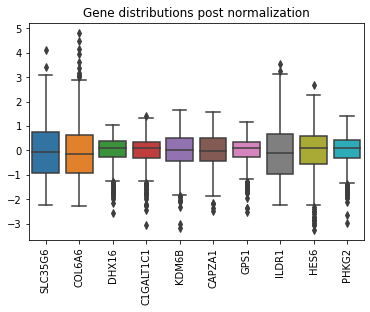

In [40]:
fig1=sns.boxplot(wide_sum_norm.sample(10, axis = 1))
fig1.set(title='Gene distributions post normalization')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)

[Text(0, 0, 'Prostate_neutrophil'),
 Text(1, 0, 'Small_Intestine_duodenum glandular cell'),
 Text(2, 0, 'Small_Intestine_goblet cell'),
 Text(3, 0, 'Lymph_Node_t cell'),
 Text(4, 0, 'Bone_Marrow_nk cell'),
 Text(5, 0, 'Bladder_bladder urothelial cell'),
 Text(6, 0, 'Small_Intestine_small intestine goblet cell'),
 Text(7, 0, 'Trachea_mucus secreting cell'),
 Text(8, 0, 'Eye_eye photoreceptor cell'),
 Text(9, 0, 'Mammary_nk cell')]

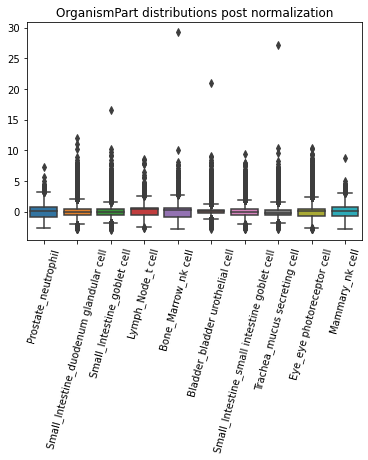

In [17]:
fig1=sns.boxplot(wide_sum_norm.transpose().sample(10, axis = 1))
fig1.set(title='OrganismPart distributions post normalization')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=75)

In [18]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(wide_sum_norm)
X_pca = pd.DataFrame(X_pca, index = meta.index)

Look at the distributions to see normality

<AxesSubplot:>

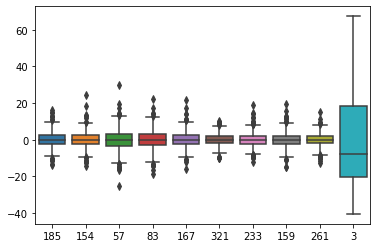

In [19]:
sns.boxplot(X_pca.sample(10, axis = 1))

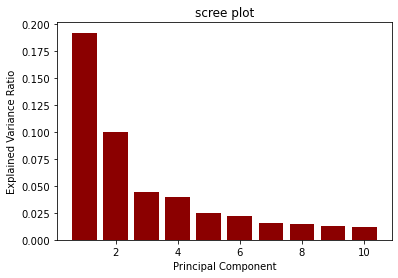

In [20]:
# Plot the scree plot
plt.bar(np.arange(1, 11), pca.explained_variance_ratio_[:10], align='center', alpha=1.0, color = 'darkred')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE plot')
plt.show()

# Plot and see if PC1 and PC2 cluster with respect to OP

/tmp/ipykernel_11111/390760309.py:6: UserWarning: 
The markers list has fewer values (3) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=meta_pca, x=0, y=1, hue='OrganismPart', legend = True, style = 'OrganismPart', markers = ['o','s','^'], palette = 'tab10' )


<Figure size 720x720 with 0 Axes>

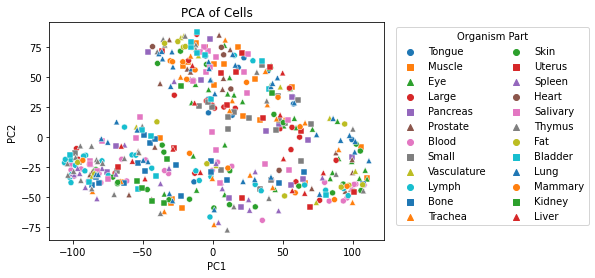

<Figure size 720x720 with 0 Axes>

In [55]:
# Plot the first two principal components
meta_pca = pd.DataFrame(X_pca).join(meta)
#add metadata to pca data

sns.set_palette('tab10') 
sns.scatterplot(data=meta_pca, x=0, y=1, hue='OrganismPart', legend = True, style = 'OrganismPart', markers = ['o','s','^'], palette = 'tab10' )
plt.legend(title='Organism Part', bbox_to_anchor=(1.02, 1), ncol=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Cells')
plt.figure(figsize=(10,10))

# Plot and see if PC1 and PC2 cluster with respect to Cell Type Profile

/tmp/ipykernel_11111/1544601048.py:5: UserWarning: 
The markers list has fewer values (3) than needed (159) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=meta_pca, x=0, y=1, hue='CellType', style = "CellType",markers = ['o','s','^'],legend = True)


Text(0.5, 1.0, 'PC2 vs PC1')

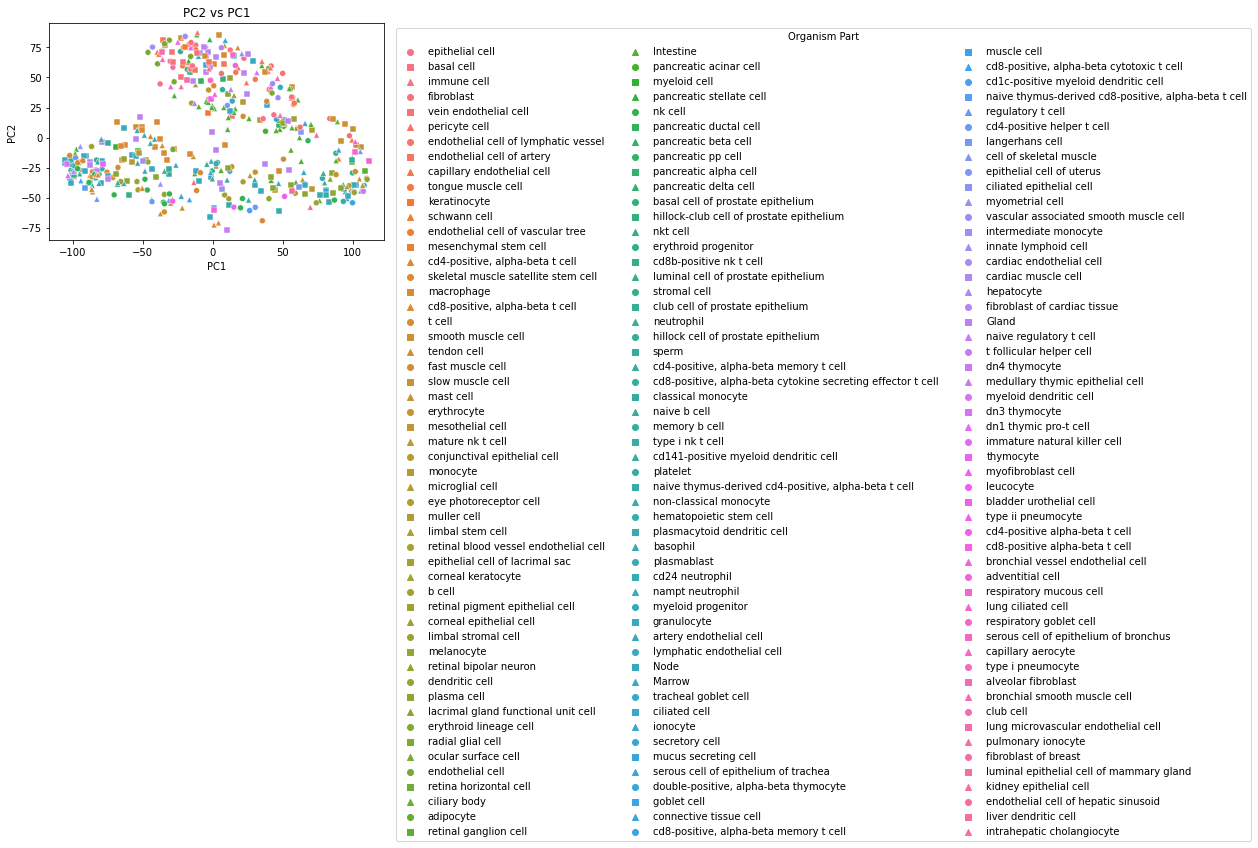

In [58]:
# Plot the first two principal components
meta_pca = pd.DataFrame(X_pca).join(meta)

#add metadata to pca data
sns.scatterplot(data=meta_pca, x=0, y=1, hue='CellType', style = "CellType",markers = ['o','s','^'],legend = True)
plt.legend(title='Organism Part', bbox_to_anchor=(1.02, 1), ncol=3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs PC1')


# One thing I noticed was the Lymphatic cells kinda clustering together. could this be because there are a lot of lymphatic specific CTs?

In [48]:
meta.head()

,OrganismPart,CellType
Tongue_epithelial cell,Tongue,epithelial cell
Tongue_basal cell,Tongue,basal cell
Tongue_immune cell,Tongue,immune cell
Tongue_fibroblast,Tongue,fibroblast
Tongue_vein endothelial cell,Tongue,vein endothelial cell


In [50]:
lymph = meta[meta.loc[:,'OrganismPart'] =='Lymph']

In [54]:
lymph.loc[:,'CellType'].unique()

array(['Node'], dtype=object)

In [56]:
fat= meta[meta.loc[:,'OrganismPart'] =='Fat']

In [57]:
fat.loc[:,'CellType'].unique()

array(['fibroblast', 'endothelial cell', 't cell', 'macrophage',
       'nk cell', 'myofibroblast cell', 'leucocyte', 'plasma cell',
       'mesenchymal stem cell', 'smooth muscle cell', 'neutrophil',
       'mast cell', 'b cell'], dtype=object)